# Model Improvements

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
# Auto ARIMA imports
import pmdarima as pm 
from pmdarima.arima import ADFTest
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf
from prophet import Prophet


In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('./dataset/dollar_exchange_cleaned.csv')

In [3]:
df.head()

,Date,CNY,OMR,IRR,THB,MYR,YER,VND,ILS,JPY,LKR,IQD,PKR,KWD,KHR,UZS,SGD,INR,BDT,PHP,JOD,LAK,IDR,KRW,KZT,AED,BHD,LBP,TRY,SAR,MVR,QAR,MMK,NPR,BND
0,2004-01-01,8.27,0.38,8569.476054,39.24,3.81,180.328936,15312.984436,4.38,107.30,96.65,1311.517255,57.30,0.29,3786.695686,712.35,1.7,45.53,57.694669,55.24,0.71,7622.044314,8336.8,1181.6,161.124825,3.67,0.38,1481.172941,1.344115,3.75,712.35,3.64,6.177686,70.052101,1.69
1,2004-01-02,8.27,0.38,8236.200000,39.53,3.80,180.328936,15147.000000,4.40,106.91,97.04,0.300000,57.10,0.29,3854.100000,712.35,1.7,45.60,57.220000,55.40,0.70,7645.700000,8445.4,1195.8,168.480000,3.67,0.38,1474.100000,1.344115,3.75,712.35,3.64,6.180000,70.600000,1.68
2,2004-01-05,8.27,0.38,8731.500000,39.26,3.80,180.328936,15148.000000,4.37,106.24,97.25,0.300000,57.10,0.29,3855.000000,712.35,1.7,45.47,57.230000,55.29,0.71,7643.700000,8369.8,1178.9,168.020000,3.67,0.38,1474.600000,1.344115,3.75,712.35,3.64,6.180000,70.620000,1.68
3,2004-01-06,8.27,0.38,8724.700000,39.03,3.80,180.328936,15150.000000,4.37,106.23,97.50,0.300000,57.10,0.29,3852.800000,712.35,1.7,45.55,56.920000,54.85,0.71,7639.000000,8361.8,1189.4,167.550000,3.67,0.38,1473.800000,1.344115,3.75,712.35,3.64,6.180000,70.580000,1.68
4,2004-01-07,8.27,0.38,8728.700000,38.97,3.81,180.328936,15153.000000,4.39,106.18,97.50,0.300000,57.35,0.29,3853.900000,712.35,1.7,45.39,57.240000,54.91,0.71,7641.500000,8369.3,1176.8,167.430000,3.67,0.38,1474.300000,1.344115,3.75,712.35,3.64,6.180000,70.600000,1.68


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4956 entries, 0 to 4955
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4956 non-null   object 
 1   CNY     4956 non-null   float64
 2   OMR     4956 non-null   float64
 3   IRR     4956 non-null   float64
 4   THB     4956 non-null   float64
 5   MYR     4956 non-null   float64
 6   YER     4956 non-null   float64
 7   VND     4956 non-null   float64
 8   ILS     4956 non-null   float64
 9   JPY     4956 non-null   float64
 10  LKR     4956 non-null   float64
 11  IQD     4956 non-null   float64
 12  PKR     4956 non-null   float64
 13  KWD     4956 non-null   float64
 14  KHR     4956 non-null   float64
 15  UZS     4956 non-null   float64
 16  SGD     4956 non-null   float64
 17  INR     4956 non-null   float64
 18  BDT     4956 non-null   float64
 19  PHP     4956 non-null   float64
 20  JOD     4956 non-null   float64
 21  LAK     4956 non-null   float64
 22  

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df = df.set_index('Date')

In [7]:
df = df.sort_index()

In [8]:
df.head()

,CNY,OMR,IRR,THB,MYR,YER,VND,ILS,JPY,LKR,IQD,PKR,KWD,KHR,UZS,SGD,INR,BDT,PHP,JOD,LAK,IDR,KRW,KZT,AED,BHD,LBP,TRY,SAR,MVR,QAR,MMK,NPR,BND
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-01-01,8.27,0.38,8569.476054,39.24,3.81,180.328936,15312.984436,4.38,107.30,96.65,1311.517255,57.30,0.29,3786.695686,712.35,1.7,45.53,57.694669,55.24,0.71,7622.044314,8336.8,1181.6,161.124825,3.67,0.38,1481.172941,1.344115,3.75,712.35,3.64,6.177686,70.052101,1.69
2004-01-02,8.27,0.38,8236.200000,39.53,3.80,180.328936,15147.000000,4.40,106.91,97.04,0.300000,57.10,0.29,3854.100000,712.35,1.7,45.60,57.220000,55.40,0.70,7645.700000,8445.4,1195.8,168.480000,3.67,0.38,1474.100000,1.344115,3.75,712.35,3.64,6.180000,70.600000,1.68
2004-01-05,8.27,0.38,8731.500000,39.26,3.80,180.328936,15148.000000,4.37,106.24,97.25,0.300000,57.10,0.29,3855.000000,712.35,1.7,45.47,57.230000,55.29,0.71,7643.700000,8369.8,1178.9,168.020000,3.67,0.38,1474.600000,1.344115,3.75,712.35,3.64,6.180000,70.620000,1.68
2004-01-06,8.27,0.38,8724.700000,39.03,3.80,180.328936,15150.000000,4.37,106.23,97.50,0.300000,57.10,0.29,3852.800000,712.35,1.7,45.55,56.920000,54.85,0.71,7639.000000,8361.8,1189.4,167.550000,3.67,0.38,1473.800000,1.344115,3.75,712.35,3.64,6.180000,70.580000,1.68
2004-01-07,8.27,0.38,8728.700000,38.97,3.81,180.328936,15153.000000,4.39,106.18,97.50,0.300000,57.35,0.29,3853.900000,712.35,1.7,45.39,57.240000,54.91,0.71,7641.500000,8369.3,1176.8,167.430000,3.67,0.38,1474.300000,1.344115,3.75,712.35,3.64,6.180000,70.600000,1.68


In [9]:
sgd_df = pd.DataFrame(df['SGD'])

In [10]:
sgd_df.head()

,SGD
Date,
2004-01-01,1.7
2004-01-02,1.7
2004-01-05,1.7
2004-01-06,1.7
2004-01-07,1.7


In [11]:
sgd_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4956 entries, 2004-01-01 to 2022-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SGD     4956 non-null   float64
dtypes: float64(1)
memory usage: 77.4 KB


In [12]:
sgd_df.index[0::1]

DatetimeIndex(['2004-01-01', '2004-01-02', '2004-01-05', '2004-01-06',
               '2004-01-07', '2004-01-08', '2004-01-09', '2004-01-12',
               '2004-01-13', '2004-01-14',
               ...
               '2022-12-19', '2022-12-20', '2022-12-21', '2022-12-22',
               '2022-12-23', '2022-12-26', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', length=4956, freq=None)

In [13]:
def plot_series(df, col, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))

    plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18);

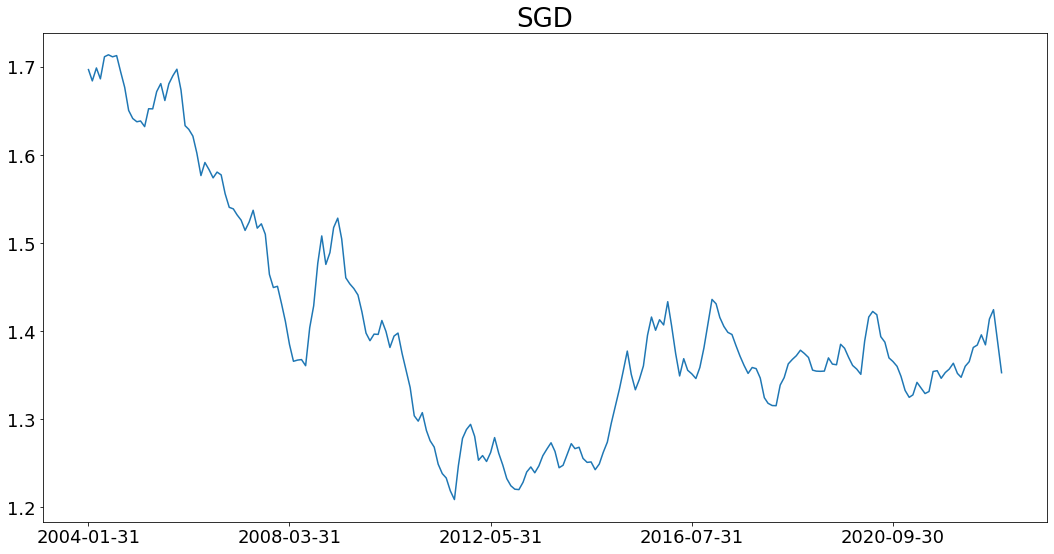

In [14]:
# Generate a time plot of our data. We only have 1 column `avg_temp`
plot_series(sgd_df.resample('M').mean(), 'SGD', title = "SGD", steps=50)

In [15]:
sgd_df = sgd_df.resample('M').interpolate().dropna()

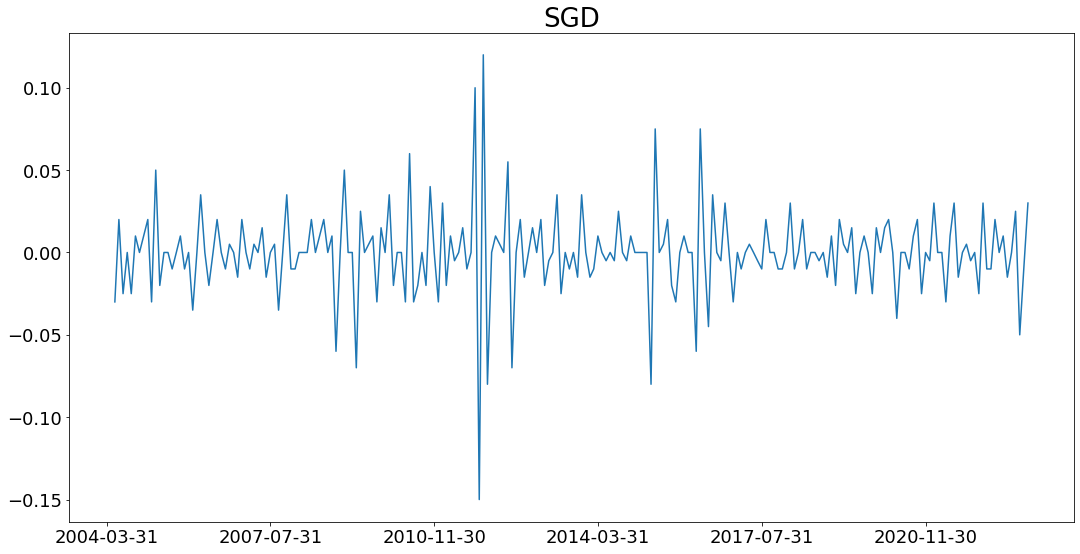

In [16]:
# Generate a time plot of our data. We only have 1 column `avg_temp`
plot_series(sgd_df.diff().diff(), 'SGD', title = "SGD", steps=40)

## Autocorrelation Function

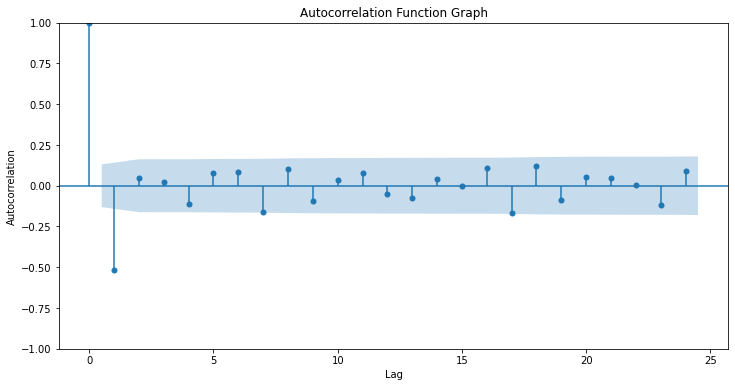

In [17]:
# Create a larger figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the ACF
plot_acf(sgd_df.diff().diff().dropna(), ax=ax)

# Set axis labels and title
ax.set_xlabel('Lag')
ax.set_ylabel('Autocorrelation')
ax.set_title('Autocorrelation Function Graph')

# Show the plot
plt.show()

Upon careful examination of the Autocorrelation Function (ACF) graph, it becomes apparent that certain bars stand out, displaying higher values compared to others. These elevated bars signify a robust correlation between the observation and its lagged values, suggesting a stronger temporal relationship.

Moreover, the ACF graph also reveals the presence of discernible autocorrelation patterns, as indicated by the notable bars in the plot. However, it is important to note that these patterns may not be immediately obvious or easily identifiable. Therefore, a thorough analysis involving trial and error becomes necessary to unravel and understand the intricate autocorrelation patterns embedded within the data.

By engaging in this iterative process of exploration and experimentation, we can gradually uncover and interpret the underlying autocorrelation structures, enabling us to make informed decisions and select appropriate modeling techniques for time series analysis.

In [18]:
adf_test = ADFTest(alpha = 0.05)
print(adf_test.should_diff(sgd_df['SGD']))

(0.5839440092967904, True)


In [19]:
diff_series = sgd_df['SGD'].diff().diff().dropna()
print(adf_test.should_diff(diff_series))

(0.01, False)


In [20]:
diff_series.head()

Date
2004-05-31   -3.000000e-02
2004-06-30    2.000000e-02
2004-07-31   -2.500000e-02
2004-08-31    2.220446e-16
2004-09-30   -2.500000e-02
Freq: M, Name: SGD, dtype: float64

This shows that I should do a .diff() to find the stationary point

Auto Arima

In [21]:
y_train, y_test = train_test_split(diff_series, test_size=.05, shuffle=False)

## SARIMA

In [22]:
sarima_model = pm.AutoARIMA(start_p=0, max_p=20, 
                           d=None, 
                           start_q=0, max_q=20,
                           
                           start_P=0, max_P=10, 
                           D=None,    
                           start_Q=0, max_Q=10,
                           m=5, 
                           seasonal=True, 
                           
                           trace=True, 
                           random_state=42,
                           n_fits=100
                          )

sarima_model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[5] intercept   : AIC=-933.947, Time=0.11 sec
 ARIMA(1,0,0)(1,0,0)[5] intercept   : AIC=-1001.468, Time=0.48 sec
 ARIMA(0,0,1)(0,0,1)[5] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[5]             : AIC=-935.930, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[5] intercept   : AIC=-1000.155, Time=0.04 sec
 ARIMA(1,0,0)(2,0,0)[5] intercept   : AIC=-999.735, Time=0.51 sec
 ARIMA(1,0,0)(1,0,1)[5] intercept   : AIC=-1002.053, Time=0.55 sec
 ARIMA(1,0,0)(0,0,1)[5] intercept   : AIC=-1001.256, Time=0.21 sec
 ARIMA(1,0,0)(2,0,1)[5] intercept   : AIC=-997.622, Time=0.56 sec
 ARIMA(1,0,0)(1,0,2)[5] intercept   : AIC=-997.406, Time=0.65 sec
 ARIMA(1,0,0)(0,0,2)[5] intercept   : AIC=-999.445, Time=0.34 sec
 ARIMA(1,0,0)(2,0,2)[5] intercept   : AIC=-998.233, Time=0.97 sec
 ARIMA(0,0,0)(1,0,1)[5] intercept   : AIC=-932.196, Time=0.46 sec
 ARIMA(2,0,0)(1,0,1)[5] intercept   : AIC=-1014.107, Time=0.23 sec
 ARIMA(2,0,0)(0,0,1)[5] intercept

AutoARIMA(m=5, max_P=10, max_Q=10, max_p=20, max_q=20, n_fits=100,
          random_state=42, start_P=0, start_Q=0, start_p=0, start_q=0,
          trace=True)

Notes:

1. value of "p" indicates the number of lagged observations included in the model. Each lagged observation is multiplied by a corresponding coefficient, and the sum of these terms is used to estimate the current value.
2. Value of "q" indicates the number of lagged forecast errors included in the model. Each lagged forecast error is multiplied by a corresponding coefficient, and the sum of these terms is used to estimate the current value.


In [23]:
y_pred = sarima_model.predict(n_periods = len(y_test))
y_pred

2022-01-31    0.018453
2022-02-28   -0.002669
2022-03-31    0.001827
2022-04-30    0.003238
2022-05-31   -0.001832
2022-06-30    0.001401
2022-07-31   -0.003135
2022-08-31    0.001079
2022-09-30    0.003297
2022-10-31   -0.002033
2022-11-30    0.000382
2022-12-31    0.000226
Freq: M, dtype: float64

In [24]:

def plot_forecast(y_train, y_test, arima_model, X_test=None):
    # Generate len(y_test) number of predictions
    y_pred = arima_model.predict(n_periods = len(y_test), X=X_test) 

    # Plot data.
    plt.figure(figsize=(30,15))
    plt.plot(y_train, color='blue', label='y_train')
    plt.plot(y_test, color='orange', label='y_test', alpha = 0.7)

    plt.plot(y_pred, color='green', label='y_pred', alpha = 0.9, ls = '--')

    mape = mean_absolute_percentage_error(y_test, y_pred) 

    plt.title(label = f'Currency Predictions\n MAPE: {mape:.2f}', fontsize=16) 
    plt.legend(fontsize = 20, loc = 'upper left');

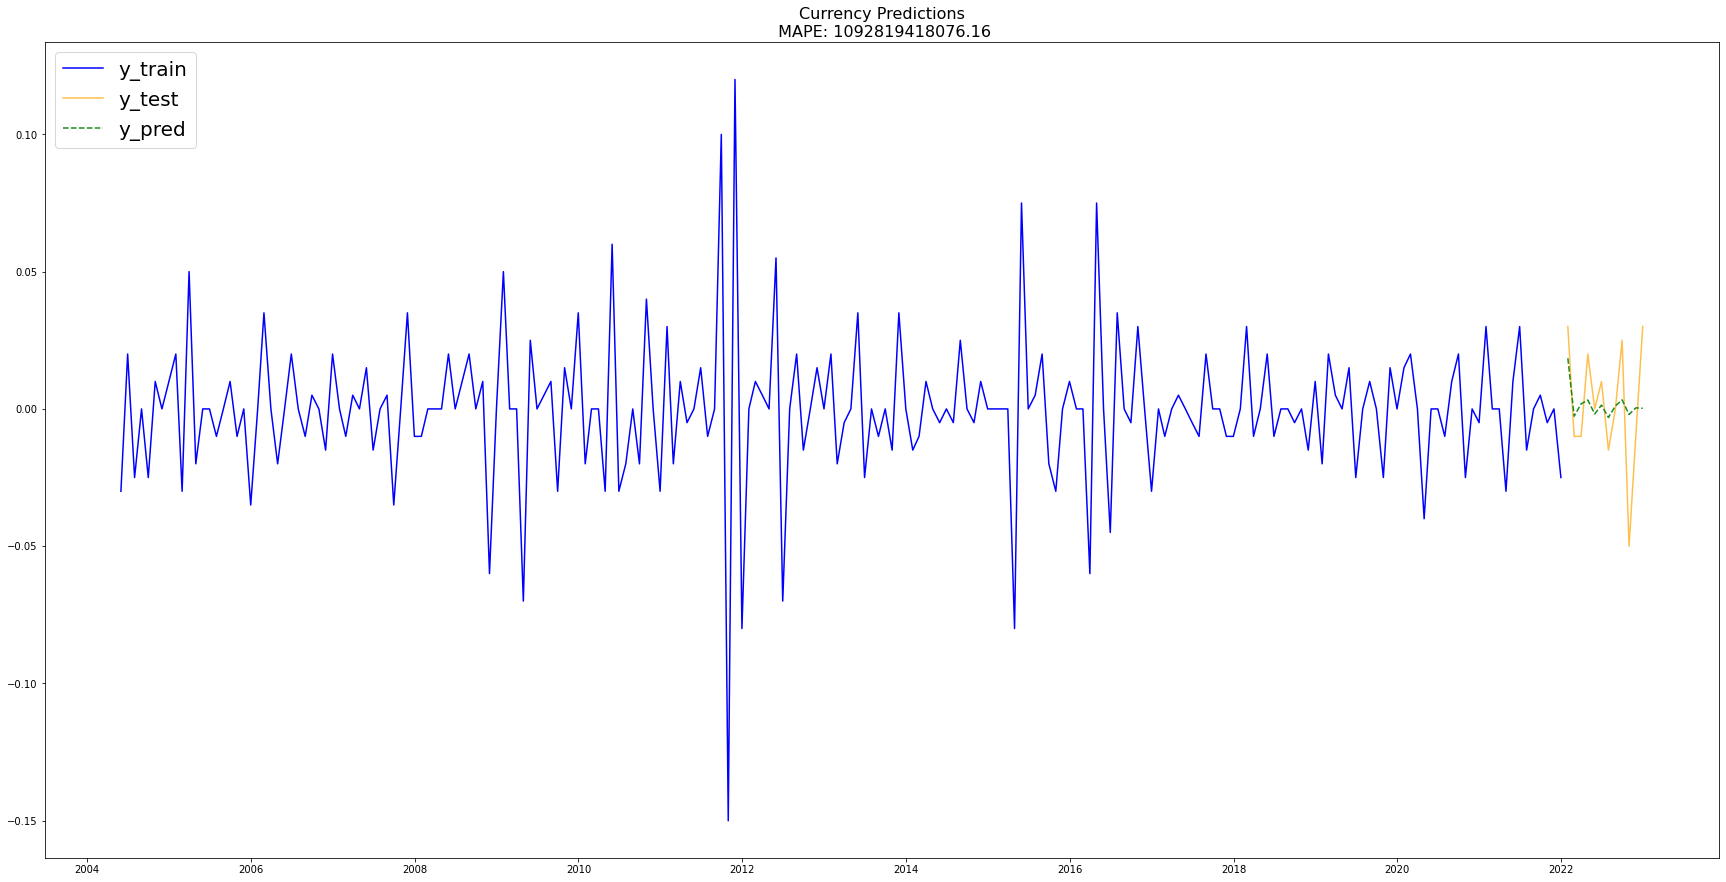

In [25]:
plot_forecast(y_train, y_test,sarima_model)

In [26]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)

1092819418076.1602


In [27]:
sarima_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
sarima_rmse 

0.019564671703155238

After thorough evaluation, it is evident that the optimal SARIMA model is ARIMA(2,0,1)(3,0,0)[5]. A noteworthy enhancement in the Mean Absolute Percentage Error (MAPE) score is observed, with the SARIMA model (1092819418076.1602) outperforming the base model (1275338280835.6262).

However, despite these improvements in the evaluation metrics, it is essential to acknowledge that the model's predictions continue to fall short in capturing the intricate fluctuation patterns exhibited by the test data. Moreover, although there has been progress in reducing the MAPE score, it remains relatively high, indicating room for further enhancements in the model's predictive capabilities.

To overcome these limitations and achieve more accurate and reliable predictions on the test data, it is crucial to explore additional avenues for improvement. This may involve fine-tuning the model parameters, considering alternative model specifications, incorporating additional relevant variables, or even exploring advanced modeling techniques. By diligently addressing these areas, we can strive to reduce the MAPE score and enhance the model's predictive performance, allowing for more precise and reliable forecasts.

## SARIMAX

In [28]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('./dataset/dollar_exchange_cleaned.csv')

In [29]:
df['Date'] = pd.to_datetime(df['Date'])

In [30]:
df = df.set_index('Date')

In [31]:
df = df.sort_index()

In [32]:
df.head()

,CNY,OMR,IRR,THB,MYR,YER,VND,ILS,JPY,LKR,IQD,PKR,KWD,KHR,UZS,SGD,INR,BDT,PHP,JOD,LAK,IDR,KRW,KZT,AED,BHD,LBP,TRY,SAR,MVR,QAR,MMK,NPR,BND
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-01-01,8.27,0.38,8569.476054,39.24,3.81,180.328936,15312.984436,4.38,107.30,96.65,1311.517255,57.30,0.29,3786.695686,712.35,1.7,45.53,57.694669,55.24,0.71,7622.044314,8336.8,1181.6,161.124825,3.67,0.38,1481.172941,1.344115,3.75,712.35,3.64,6.177686,70.052101,1.69
2004-01-02,8.27,0.38,8236.200000,39.53,3.80,180.328936,15147.000000,4.40,106.91,97.04,0.300000,57.10,0.29,3854.100000,712.35,1.7,45.60,57.220000,55.40,0.70,7645.700000,8445.4,1195.8,168.480000,3.67,0.38,1474.100000,1.344115,3.75,712.35,3.64,6.180000,70.600000,1.68
2004-01-05,8.27,0.38,8731.500000,39.26,3.80,180.328936,15148.000000,4.37,106.24,97.25,0.300000,57.10,0.29,3855.000000,712.35,1.7,45.47,57.230000,55.29,0.71,7643.700000,8369.8,1178.9,168.020000,3.67,0.38,1474.600000,1.344115,3.75,712.35,3.64,6.180000,70.620000,1.68
2004-01-06,8.27,0.38,8724.700000,39.03,3.80,180.328936,15150.000000,4.37,106.23,97.50,0.300000,57.10,0.29,3852.800000,712.35,1.7,45.55,56.920000,54.85,0.71,7639.000000,8361.8,1189.4,167.550000,3.67,0.38,1473.800000,1.344115,3.75,712.35,3.64,6.180000,70.580000,1.68
2004-01-07,8.27,0.38,8728.700000,38.97,3.81,180.328936,15153.000000,4.39,106.18,97.50,0.300000,57.35,0.29,3853.900000,712.35,1.7,45.39,57.240000,54.91,0.71,7641.500000,8369.3,1176.8,167.430000,3.67,0.38,1474.300000,1.344115,3.75,712.35,3.64,6.180000,70.600000,1.68


In [33]:
X = df.drop(columns = 'SGD')

In [34]:
X = X.apply(lambda x: x.resample('M').interpolate().dropna())

In [35]:
X = X.apply(lambda x : x.diff().diff().dropna())

In [36]:
X_train, X_test = train_test_split(X, test_size=.05, shuffle=False)

In [37]:
X_train.shape

(212, 33)

In [38]:
y_train.shape

(212,)

In [39]:
sarimax_model = pm.AutoARIMA(start_p=0, max_p=20, 
                           d=None, 
                           start_q=0, max_q=20,
                           
                           start_P=0, max_P=10, 
                           D=None,    
                           start_Q=0, max_Q=10,
                           m=5, 
                           seasonal=True, 
                           
                           trace=True, 
                           random_state=42,
                           n_fits=100
                          )

sarimax_model.fit(y_train,X_train)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[5] intercept   : AIC=-1264.130, Time=0.49 sec
 ARIMA(1,0,0)(1,0,0)[5] intercept   : AIC=-1292.634, Time=2.86 sec
 ARIMA(0,0,1)(0,0,1)[5] intercept   : AIC=-1320.020, Time=2.88 sec
 ARIMA(0,0,0)(0,0,0)[5]             : AIC=-341.510, Time=0.41 sec
 ARIMA(0,0,1)(0,0,0)[5] intercept   : AIC=-1321.840, Time=1.58 sec
 ARIMA(0,0,1)(1,0,0)[5] intercept   : AIC=-1320.610, Time=2.59 sec
 ARIMA(0,0,1)(1,0,1)[5] intercept   : AIC=-1317.898, Time=3.06 sec
 ARIMA(1,0,1)(0,0,0)[5] intercept   : AIC=-1334.252, Time=1.69 sec
 ARIMA(1,0,1)(1,0,0)[5] intercept   : AIC=-1333.099, Time=2.88 sec
 ARIMA(1,0,1)(0,0,1)[5] intercept   : AIC=-1332.423, Time=3.04 sec
 ARIMA(1,0,1)(1,0,1)[5] intercept   : AIC=-1330.440, Time=3.33 sec
 ARIMA(1,0,0)(0,0,0)[5] intercept   : AIC=-1294.566, Time=0.97 sec
 ARIMA(2,0,1)(0,0,0)[5] intercept   : AIC=-1333.755, Time=1.78 sec
 ARIMA(1,0,2)(0,0,0)[5] intercept   : AIC=-1349.975, Time=2.10 sec
 ARIMA(1,0,2)(1,0,0)

AutoARIMA(m=5, max_P=10, max_Q=10, max_p=20, max_q=20, n_fits=100,
          random_state=42, start_P=0, start_Q=0, start_p=0, start_q=0,
          trace=True)

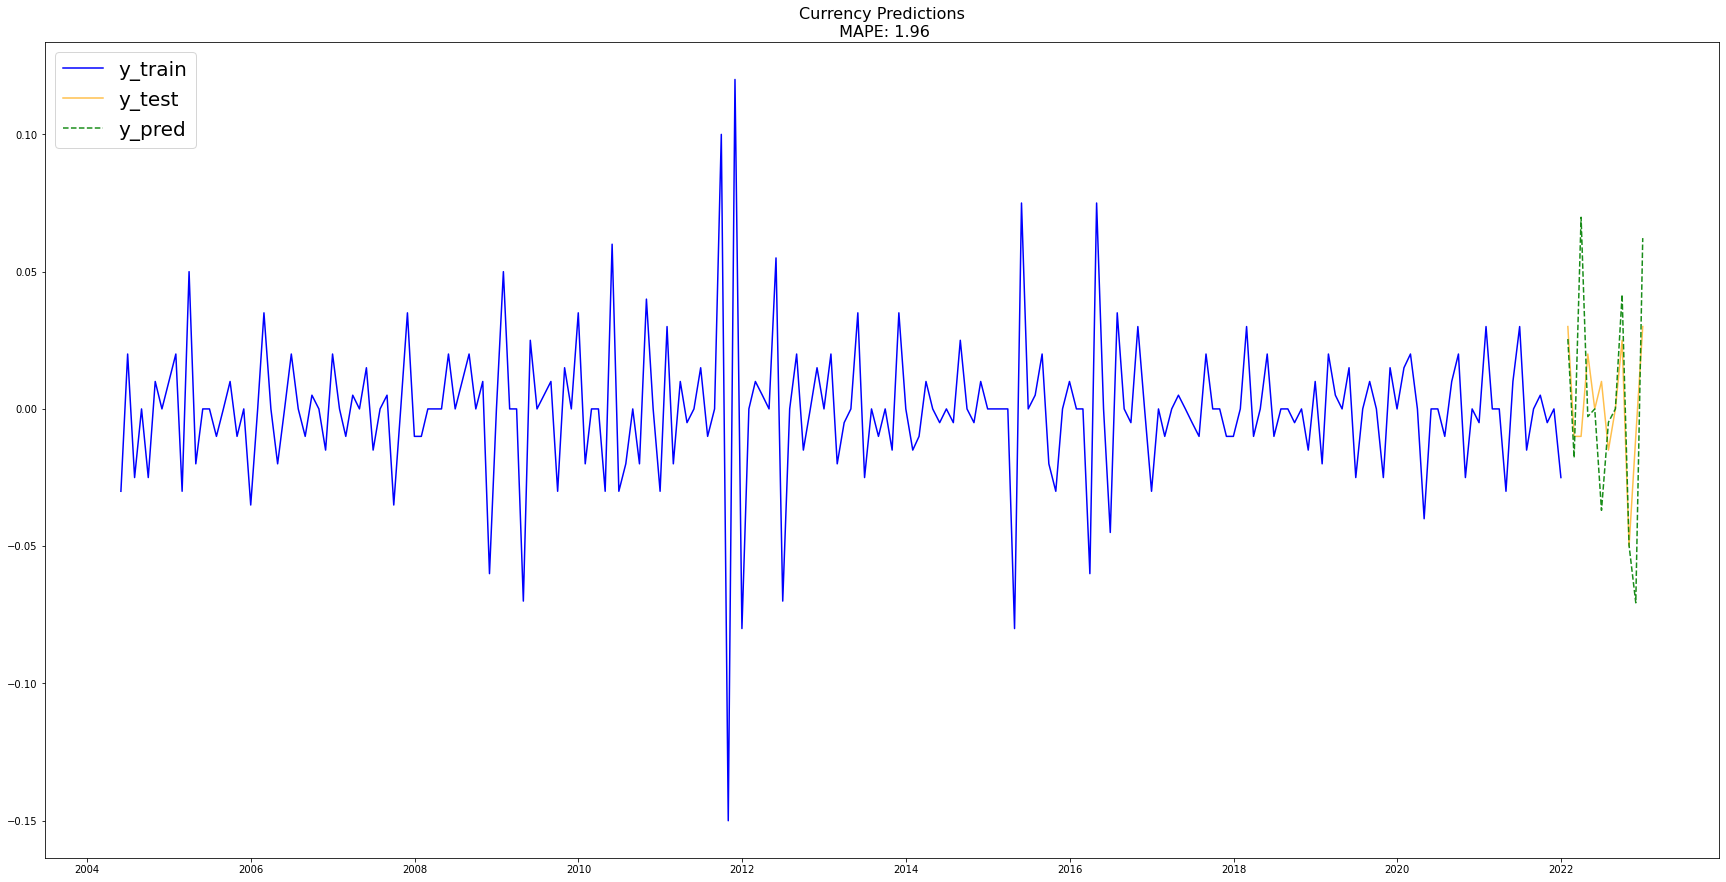

In [40]:
plot_forecast(y_train, y_test,sarimax_model, X_test = X_test)

In [41]:
y_pred = sarimax_model.predict(n_periods = len(y_test), X=X_test)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)

1.9631024127647674


In [42]:
sarimax_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
sarimax_rmse 

0.03447944919698806

The most optimal model in SARIMAX was ARIMA(0,0,3)(0,0,0)[5]. The MAPE(1.9631024127647674) was significantly lower as compared to the base model (1275338280835.6262). This improvement is reflected in the graph as shown. The predictions are able to fluctuations and patterns exhibited by the test data. On further investigations, the model might have been over estimating on certain fluctuation patterns by the test data. 

## PROPHET

In [43]:
df['SGD'].head()

Date
2004-01-01    1.7
2004-01-02    1.7
2004-01-05    1.7
2004-01-06    1.7
2004-01-07    1.7
Name: SGD, dtype: float64

In [44]:
prophet_sgd_df = df['SGD'].reset_index()

In [45]:
prophet_sgd_df.head()

,Date,SGD
0,2004-01-01,1.7
1,2004-01-02,1.7
2,2004-01-05,1.7
3,2004-01-06,1.7
4,2004-01-07,1.7


In [46]:
prophet_sgd_df.rename({'Date':'ds', 'SGD':'y'},axis = 1,inplace=True)

In [47]:
prophet_sgd_df.head()

,ds,y
0,2004-01-01,1.7
1,2004-01-02,1.7
2,2004-01-05,1.7
3,2004-01-06,1.7
4,2004-01-07,1.7


In [48]:
y_train, y_test = train_test_split(prophet_sgd_df, test_size=.05, shuffle=False)

In [49]:
y_train.head()

,ds,y
0,2004-01-01,1.7
1,2004-01-02,1.7
2,2004-01-05,1.7
3,2004-01-06,1.7
4,2004-01-07,1.7


In [50]:
y_test.tail()

,ds,y
4951,2022-12-26,1.35
4952,2022-12-27,1.35
4953,2022-12-28,1.35
4954,2022-12-29,1.35
4955,2022-12-30,1.34


In [51]:
prophet = Prophet()
prophet.fit(y_train)

17:31:33 - cmdstanpy - INFO - Chain [1] start processing
17:31:35 - cmdstanpy - INFO - Chain [1] done processing


In [52]:
y_test = y_test.reset_index(drop=True)  # Reset index of y_test

future = prophet.make_future_dataframe(periods=len(y_test), freq='D', include_history=False)
future.tail()

,ds
243,2022-09-19
244,2022-09-20
245,2022-09-21
246,2022-09-22
247,2022-09-23


In [53]:
y_test.shape

(248, 2)

In [54]:
forecast = prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
243,2022-09-19,1.357219,1.285060,1.420821
244,2022-09-20,1.357859,1.280750,1.420374
245,2022-09-21,1.357588,1.282713,1.422410
246,2022-09-22,1.358077,1.280207,1.421557
247,2022-09-23,1.358109,1.283390,1.425721


Notes:

In Prophet, the `forecast` object contains the predicted values and uncertainty intervals for the future time periods. The `forecast` object has several columns, including 'ds', 'yhat', 'yhat_lower', and 'yhat_upper', which can be accessed using `forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]`. Here's what these columns represent:

- 'ds': This column represents the dates or timestamps of the future time periods for which the predictions are made.

- 'yhat': This column contains the predicted values or the forecasted values for the corresponding dates in the 'ds' column.

- 'yhat_lower': This column represents the lower bounds of the uncertainty intervals for the predicted values. It provides a lower estimate or range within which the actual values are likely to fall.

- 'yhat_upper': This column represents the upper bounds of the uncertainty intervals for the predicted values. It provides an upper estimate or range within which the actual values are likely to fall.

By accessing `forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()`, you will get the last few rows of the forecasted values, their corresponding dates, and the uncertainty intervals.

In [55]:
predicted_values = forecast[['ds', 'yhat']]

In [56]:
predicted_values.head()

,ds,yhat
0,2022-01-19,1.354352
1,2022-01-20,1.354498
2,2022-01-21,1.354177
3,2022-01-22,1.349814
4,2022-01-23,1.349803


In [57]:
y_test.head()

,ds,y
0,2022-01-19,1.35
1,2022-01-20,1.35
2,2022-01-21,1.35
3,2022-01-24,1.34
4,2022-01-25,1.35


In [61]:
forecasted_values = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
combined_df = forecasted_values.merge(y_test, on='ds', how='inner')

In [62]:
combined_df['abs_pct_error'] = abs(combined_df['y'] - combined_df['yhat']) / combined_df['y']

In [63]:
mape = combined_df['abs_pct_error'].mean() * 100
mape

1.9493338367447215

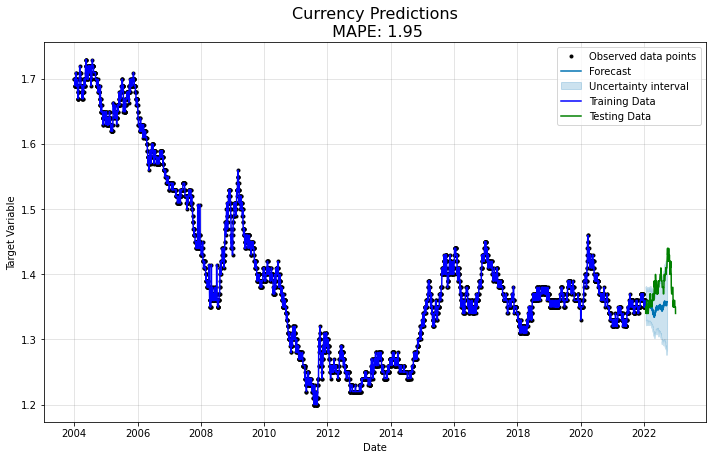

In [64]:
fig1 = prophet.plot(forecast, xlabel='Date', ylabel='Target Variable')

# Plotting the actual values from y_train and y_test
plt.plot(y_train['ds'], y_train['y'], label='Training Data', color='blue')
plt.plot(y_test['ds'], y_test['y'], label='Testing Data', color='green')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Target Variable')
plt.legend()

plt.title(label = f'Currency Predictions\n MAPE: {mape:.2f}', fontsize=16) 

# Display the plot
plt.show()

In [65]:
prophet_rmse = np.sqrt(mean_squared_error(y_test['y'], predicted_values['yhat']))
prophet_rmse 

0.04084263807198935

When the Prophet model was introduced, it achieved a lower MAPE (Mean Absolute Percentage Error) of 1.73 compared to SARIMAX's MAPE of 1.96. This indicates that the Prophet model had a better overall accuracy in forecasting. However, upon plotting the predicted data against the test data, it became apparent that the model struggled to capture the fluctuations present in the test data.

Despite this limitation, Prophet provides a valuable feature known as the uncertainty interval. The uncertainty interval is a measure of the model's confidence in its predictions. With a 95% uncertainty interval, Prophet estimates that there is a 95% probability that the actual values will fall within the interval surrounding the forecasted values.

Taking the uncertainty intervals into account, it is observed that the majority of the test data falls within the range of the uncertainty intervals. This suggests that Prophet's predictions are accurate to a certain extent, with most of the predicted values aligning closely with the upper bound of the prediction range.

In summary, while the Prophet model may struggle to capture the full range of fluctuations in the test data, it provides valuable information through its uncertainty intervals. These intervals indicate the model's confidence in its predictions, and the test data generally aligns with the predicted range of values. Further improvements may be explored to enhance the model's ability to capture the full spectrum of fluctuations.

# Discussion

|   Model      |   MAPE             |   RMSE      |
|:------------:|:------------------:|:-----------:|
|   ARIMA      |   1275338280835    |   0.02032   |
|   SARIMA     |   1092819418076    |   0.0195    |
|   PROPHET    |   1.729            |   0.0408    | 
|   SARIMAX    |   1.963            |   0.0345    |

Based on the analysis, the table reveals that SARIMA achieves the lowest RMSE among the considered models. However, SARIMA's MAPE is relatively high compared to Prophet and SARIMAX. Therefore, the preferable options are Prophet and SARIMAX. Although Prophet exhibits a slightly lower MAPE compared to SARIMAX, the visual inspection of the prediction versus test data graphs indicates that SARIMAX effectively captures the intricate fluctuation patterns displayed by the test data. Consequently, SARIMAX emerges as the preferred model for accurate predictions of SGD's currency.

## Future Works

Moving forward, there are several future works that can be undertaken in the field of forecasting SGD currency. One important area of focus would be to expand the dataset by web scraping additional data from 2023 onwards. This would ensure that the model has access to the most up-to-date information for accurate predictions. While SARIMAX has been identified as the preferred model for SGD currency prediction, there is still room for improvement. The model currently tends to slightly overestimate the data, so efforts can be directed towards refining the model to enhance its predictive capabilities. Furthermore, it would be worthwhile to explore other time series models such as Exponential Smoothing, Vector Autoregression, Gaussian Process Regression, among others. By investigating and comparing the performance of these alternative models, we can gain a deeper understanding of their strengths and weaknesses and potentially identify a more accurate and robust forecasting approach for SGD currency.

## Conclusion

In conclusion, this project has successfully analyzed and provided valuable insights into the currency fluctuations of SGD, CNY, and THB. Moreover, a robust predictive model based on SARIMAX has been developed, enabling stakeholders to make informed decisions in various domains including economic planning, risk management, and investment strategies. The availability of accurate and timely predictive data empowers stakeholders to navigate the complexities of the currency market with greater confidence. However, it is important to acknowledge that the effectiveness of the model may diminish over time due to evolving market dynamics. Therefore, it is crucial to regularly update the model to ensure its relevance and reliability in capturing the changing patterns and trends of SGD currency and various factors that affects the currency. By continuously refining and updating the model, stakeholders can stay ahead of the curve and make more accurate predictions for informed decision-making in the future.